In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib as jb

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [26]:
df = jb.load('A:/projectwater/data/process/ori_new.pkl')
df

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethes,turbidity,potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [27]:
target = 'potability'
x = df.drop(target,axis=1).copy()
y = df[target].copy()

In [28]:
x

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethes,turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: potability, Length: 3276, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [31]:
jb.dump(x_train,'A:/projectwater/data/process/x_train.pkl')
jb.dump(y_train,'A:/projectwater/data/process/y_train.pkl')
jb.dump(x_valid,'A:/projectwater/data/process/x_valid.pkl')
jb.dump(y_valid,'A:/projectwater/data/process/y_valid.pkl')
jb.dump(x_test,'A:/projectwater/data/process/x_test.pkl')
jb.dump(y_test,'A:/projectwater/data/process/y_test.pkl')

['A:/projectwater/data/process/y_test.pkl']

In [32]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [33]:
train_set.isnull().sum().sort_values

<bound method Series.sort_values of ph                0
hardness          0
solids            0
chloramines       0
sulfate           0
conductivity      0
organic_carbon    0
trihalomethes     0
turbidity         0
potability        0
dtype: int64>

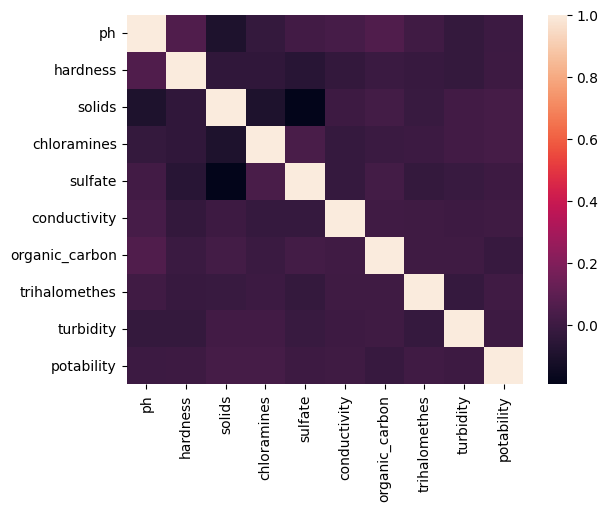

In [34]:
sns.heatmap(train_set.corr(numeric_only = True))
plt.show()

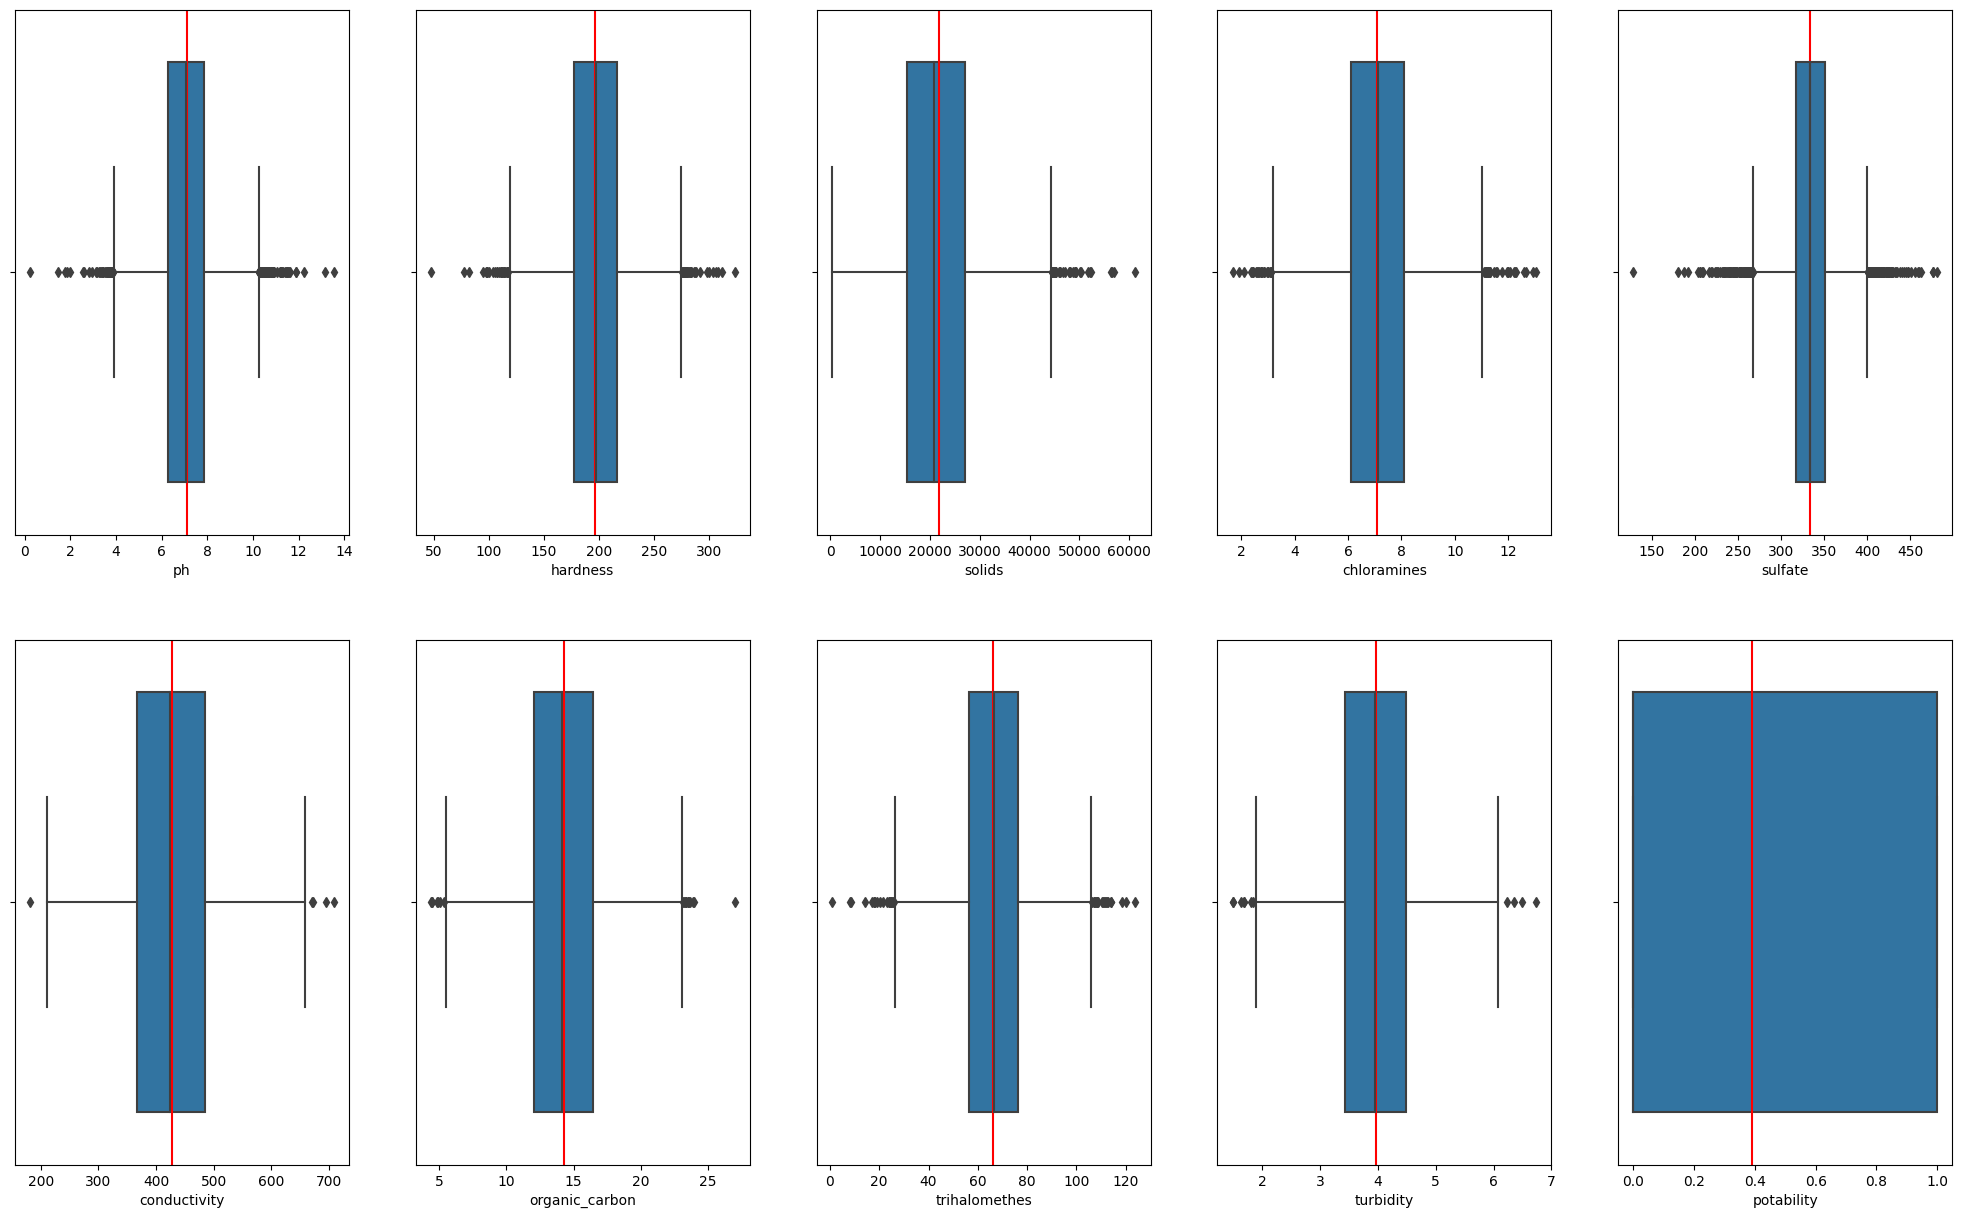

In [35]:
plt.style.use('default')

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,15))

for j,i in enumerate(train_set.columns):
    sns.boxplot(x=train_set[i], ax=ax[j//5,j%5])
    ax[j//5, j%5].axvline(train_set[i].mean(), 0, 1, color = 'r')
plt.show()